In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path

In [4]:
# load data tables (dataframes, .csv files)
analysis_path = "D:\\Users\\mickey\\Data\\analysis\\prediction_p10_1s_20201020151722"
metric_stat_df = pd.read_csv(path.join(analysis_path,'prediction_metric_stats.csv'))
metric_stat_all_df = pd.read_csv(path.join(analysis_path,'prediction_metric_all_stats.csv'))
metric_stat_bin_df = pd.read_csv(path.join(analysis_path,'prediction_metric_bin_stats.csv'))

In [53]:
# make xlabel string
rec_label = [f'{path.basename(path.dirname(path.dirname(f)))[-2:]}.{path.basename(path.dirname(f))}' for f in metric_stat_all_df.file_path]
print(rec_label)

['25.001', '25.002', '25.003', '25.004', '25.005', '25.006', '25.007', '25.008', '25.009', '25.010', '26.002', '26.003', '26.004', '26.005', '26.006', '26.007', '26.008', '26.009', '26.010', '27.001', '27.002', '27.003', '27.004', '27.005', '27.006', '27.007', '27.008', '27.009', '28.001', '28.002', '28.003', '28.004', '28.005', '28.006', '28.007', '28.008', '28.009', '28.010', '28.011']


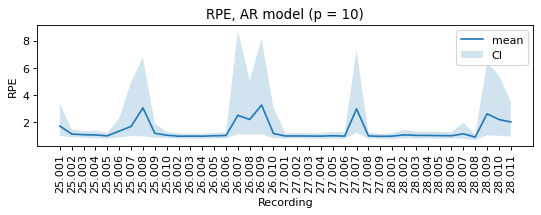

In [185]:
rec_day = [path.basename(path.dirname(path.dirname(f)))[-2:] for f in metric_stat_all_df.file_path]
plt.figure(figsize=(8,2),dpi=80)
plt.fill_between(np.arange(len(metric_stat_all_df)),metric_stat_all_df['rpe_ci_2.5'],metric_stat_all_df['rpe_ci_97.5'],label='CI',alpha=0.2)
plt.plot(metric_stat_all_df.rpe_mean,label='mean')
plt.xticks(ticks=np.arange(len(metric_stat_all_df)),labels=rec_label,rotation=90);
plt.legend(loc=0)
plt.title('RPE, AR model (p = 10)')
plt.xlabel('Recording')
plt.ylabel('RPE')
plt.savefig(path.join(analysis_path,'rpe_v_files.png'))

In [176]:
model_use_idx = np.array([1,2,3,4,9,10,11,12,13,14,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34])
# display(metric_stat_all_df.iloc[model_use_idx])

In [180]:
files_used = list(metric_stat_all_df.file_path.iloc[model_use_idx])
stat_bin_use = [f in files_used for f in list(metric_stat_bin_df.file_path)]
metric_stat_bin_df['file_label'] = np.array(rec_label).repeat(10)

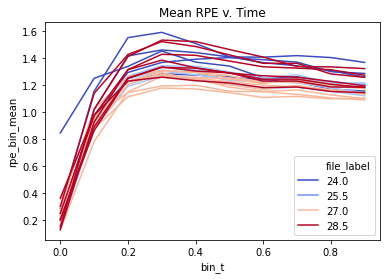

In [188]:
g = sns.lineplot(x='bin_t',y='rpe_bin_mean',hue="file_label"
    ,data=metric_stat_bin_df[stat_bin_use],ci=None,palette='coolwarm')
g.set_title("Mean RPE v. Time")
g.get_figure().savefig(path.join(analysis_path,"mean_rpe_v_time.png"))
# g.set_legend(rec_label)

AttributeError: module 'seaborn' has no attribute 'figure'